In [50]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer

# Loading Dataset

In [51]:
# Download and Unzip the Dataset
url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%205%20-%20Data%20Processing/W5D4%20-%20Mini-project/US%20Cars%20Dataset.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [52]:
# Loading Set into a Dataframe
df = pd.read_csv(r'C:\Repositories\DI-Bootcamp\Week9\Day3\DailyChallenge\data\USA_cars_datasets.csv')
print(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB
None    Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1           1   2899       fo

In [53]:
# Understanding Numeric Columns
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [54]:
# Understanding Categorical Columns
categorical_df = df.select_dtypes(exclude=['number'])

for col in categorical_df:
    print(categorical_df[col].value_counts(), '\n')

brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
infiniti             12
honda                12
mercedes-benz        10
cadillac             10
heartland             5
audi                  4
land                  4
peterbilt             4
acura                 3
mazda                 2
lexus                 2
lincoln               2
toyota                1
harley-davidson       1
jaguar                1
maserati              1
ram                   1
Name: count, dtype: int64 

model
door       651
f-150      219
doors      148
caravan    102
mpv         87
          ... 
juke         1
xterra       1
kicks        1
xd           1
nvp          1
Name: count, Length: 127, dtype: int64 

title_status
clean vehicle        2336
salvage insurance     163
Name: count, dtyp

# Cleaning and Preprocessing

In [55]:
# Dropping Unecessary Columns
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [ ]:
# Colors Column
# During EDA there were a few weird values, use the condition to find the index of these entries
no_colors = df[df['color'] == 'color:'].index

# Change the value in 'color' column to no color, depnding on the indexes
df.loc[no_colors, 'color'] = 'no_color'

df['color'].value_counts()

color
white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    66
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
beige                                        5
shadow black                                 5
oxford white                                 4
ingot silver metallic                        4
super black                                  3
triple yellow tri-coat                       3
billet silver metallic clearcoat             3
ruby re

In [57]:
# Condition Column
# Group less common values
def simplify_condition(condition):
    if pd.isna(condition):
        return 'Unknown'
    elif 'Expired' in str(condition):
        return 'Expired'
    elif 'days left' in str(condition):
        return 'Days Left'
    elif 'hours left' in str(condition):
        return 'Hours Left'
    elif 'minutes' in str(condition):
        return 'Minutes Left'
    else:
        return 'Other'
    
df['simple_condition'] = df['condition'].apply(simplify_condition)

df['simple_condition'].value_counts()

simple_condition
Days Left       1395
Hours Left      1030
Minutes Left      54
Expired           20
Name: count, dtype: int64

# Visual Analysis

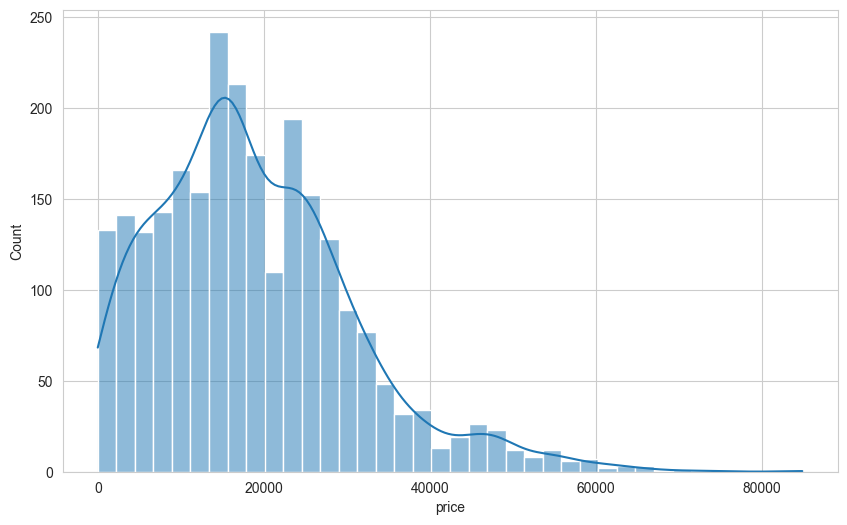

In [58]:
# Visualizing Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df, x='price', kde=True)
plt.show()


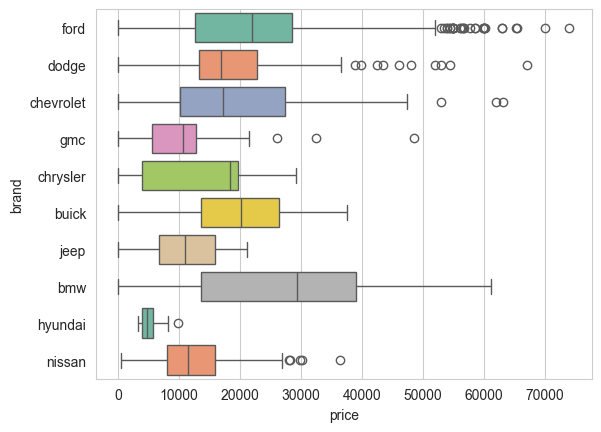

In [59]:
# Create a box plot showing price distribution by brand (top 10 brands)
# Determine Top 10 Brands
top_10_brands = df['brand'].value_counts().head(10)

# Filter DF to Only include these brands
df_10 = df[df['brand'].isin(top_10_brands.index)]

# Create Box Plot
sns.boxplot(df_10, x='price', y='brand', orient='h', palette='Set2')
plt.show()


In [61]:
import plotly.express as px
# Create an interactive scatter plot of Price vs. Mileage, color-coded by Condition
fig = px.scatter(df, x='price', y='mileage', color='simple_condition', title='Vehicle Price by Mileage and Condition')
fig.show()

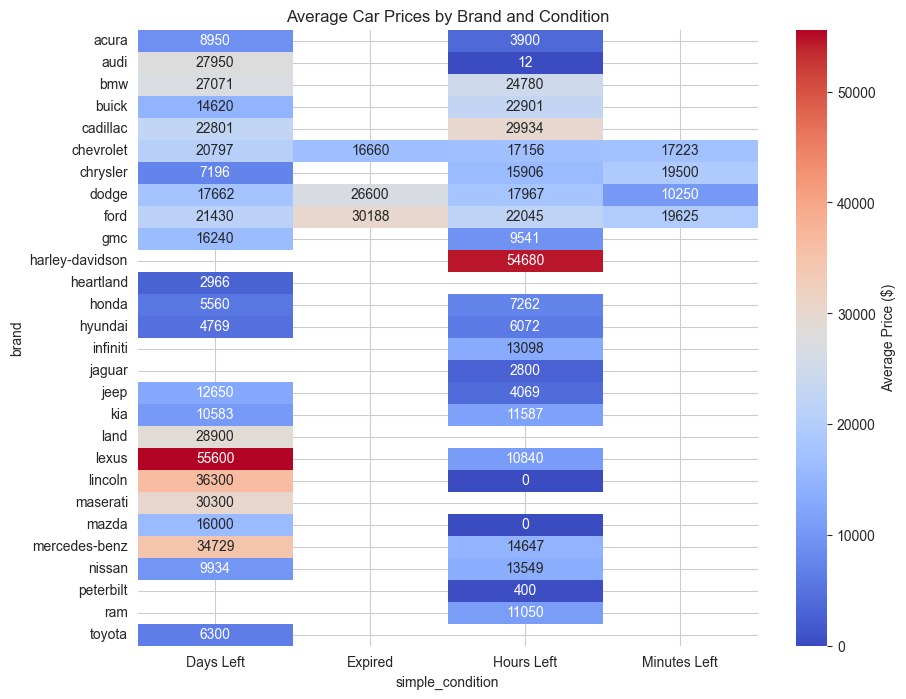

In [70]:
# Create a heatmap of average prices by brand and condition
# Create Aggregated Series
avgs = df.groupby(['brand', 'simple_condition'])['price'].mean()


# Convert Series to a DataFrame and pivot
heatmap_data = avgs.reset_index().pivot(index='brand', 
                                       columns='simple_condition', 
                                       values='price')

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, 
           annot=True,          # Show values in cells
           fmt='.0f',           # Format as integers (no decimals)
           cmap='coolwarm',       # Color scheme
           cbar_kws={'label': 'Average Price ($)'})
plt.title('Average Car Prices by Brand and Condition')
plt.show()